# Mão na massa - Aula 1

In [1]:
url = '/content/drive/MyDrive/Alura/Cursos/3773 - TensorFlow Keras: Classificando imagens com redes convolucionais/Projeto/catarata'

In [2]:
import pathlib

In [3]:
data_dir=pathlib.Path(url)

In [4]:
import tensorflow as tf

In [5]:
batch_size = 64
altura = 416
largura = 416

In [6]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [7]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


In [8]:
treino.class_names

['immature', 'mature']

# Mão na massa - Aula 2

In [9]:
tf.random.set_seed(245)

In [10]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  #
])


In [11]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [12]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 633ms/step - accuracy: 0.5017 - loss: 197.1086 - val_accuracy: 0.4634 - val_loss: 182.0222
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.5151 - loss: 100.0394 - val_accuracy: 0.5366 - val_loss: 60.8253
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.5167 - loss: 49.7395 - val_accuracy: 0.4634 - val_loss: 18.0504
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.4829 - loss: 22.5166 - val_accuracy: 0.7317 - val_loss: 0.9336
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.6358 - loss: 6.4433 - val_accuracy: 0.6098 - val_loss: 4.2799
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.7139 - loss: 3.1707 - val_accuracy: 0.7195 - val_loss: 1.2928
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.7581 - loss: 1.8622 - val_accuracy: 0.8171 - val_loss: 1.1348
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.7486 - loss: 2.6524 - val_accuracy: 0.8780 -

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

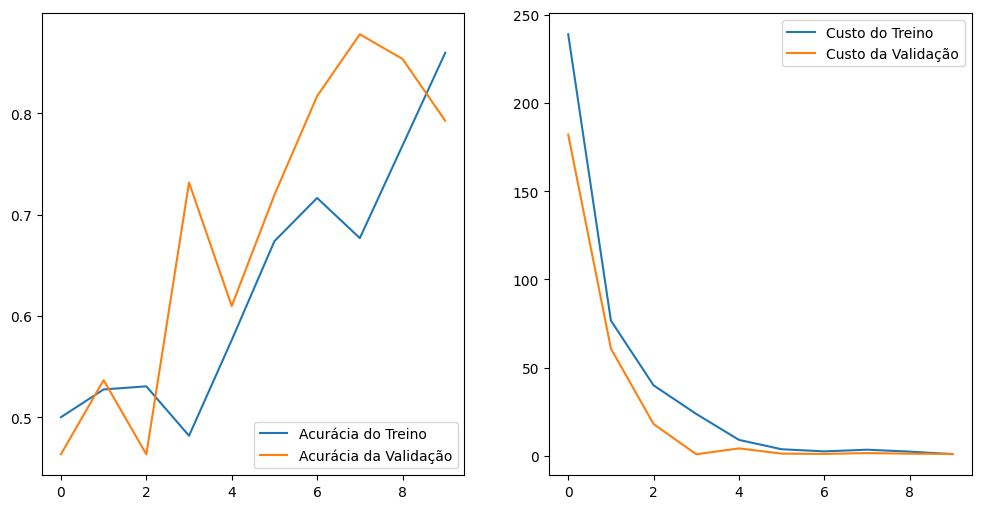

In [15]:
plota_resultados(history,epocas)

# Mão na massa - Aula 3

In [16]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [17]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [18]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5239 - loss: 5.1759 - val_accuracy: 0.5366 - val_loss: 2.1135
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.5545 - loss: 1.4974 - val_accuracy: 0.5854 - val_loss: 0.7312
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.7348 - loss: 0.6052 - val_accuracy: 0.7683 - val_loss: 0.5328
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.8049 - loss: 0.4569 - val_accuracy: 0.8049 - val_loss: 0.4532
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.8797 - loss: 0.3267 - val_accuracy: 0.8293 - val_loss: 0.4666
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.9193 - loss: 0.2095 - val_accuracy: 0.8659 - val_loss: 0.4453
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.9639 - loss: 0.0949 - val_accuracy: 0.8780 - val_loss: 0.3404
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.9974 - loss: 0.0307 - val_accuracy: 0.8659 - val_loss: 0

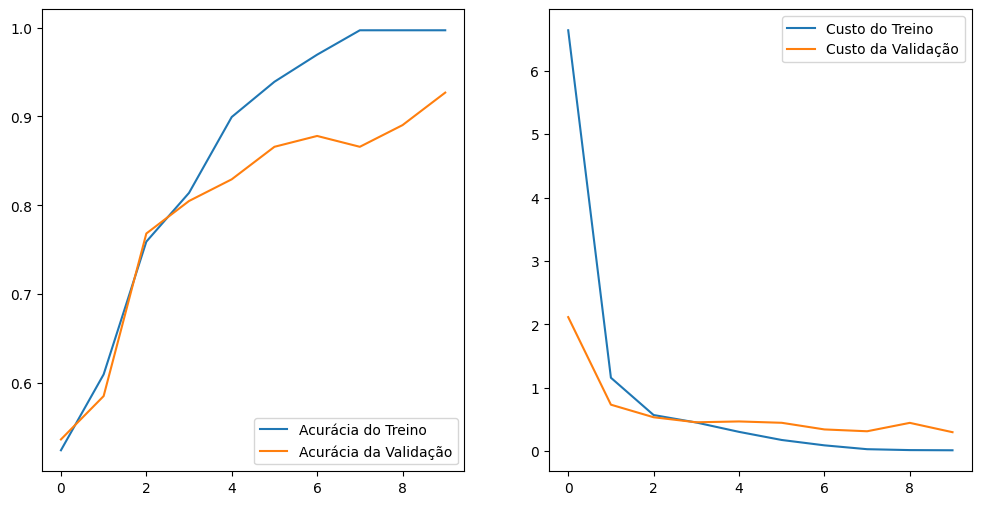

In [19]:
plota_resultados(history,epocas)

# Mão na massa - Aula 4

In [20]:
input_shape=(416, 416, 3)

In [21]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape,include_top=False,weights='imagenet' )

In [22]:
modelo_base.trainable = False

In [23]:
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 416, 416, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 207, 207, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 207, 207, 32)   │             96 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 207, 207, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 205, 205, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 205, 205, 32)   │             96 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 205, 205, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 205, 205, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 205, 205, 64)   │            192 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 205, 205, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 102, 102, 64)   │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 102, 102, 80)   │          5,120 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 102, 102, 80)   │            240 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 102, 102, 80)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 100, 100, 192)  │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 100, 100, 192)  │            576 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [24]:
rescale = tf.keras.layers.Rescaling((1./255))
treino = treino.map(lambda x, y: (rescale(x), y))
validacao = validacao.map(lambda x, y: (rescale(x), y))

In [25]:
ultima_camada = modelo_base.get_layer('mixed7')

ultima_saida = ultima_camada.output

In [26]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
modelo = tf.keras.Model(inputs=modelo_base.input,outputs=x)

In [27]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [28]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - accuracy: 0.5595 - loss: 19.7989 - val_accuracy: 0.7195 - val_loss: 4.4315
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.9496 - loss: 0.8747 - val_accuracy: 0.9146 - val_loss: 0.6968
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 538ms/step - accuracy: 0.9878 - loss: 0.1808 - val_accuracy: 0.9878 - val_loss: 0.1412
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - accuracy: 0.9981 - loss: 0.0128 - val_accuracy: 0.9756 - val_loss: 0.6726
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 512ms/step - accuracy: 0.9981 - loss: 0.0180 - val_accuracy: 0.9756 - val_loss: 0.7996
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step - accuracy: 0.9940 - loss: 0.0492 - val_accuracy: 0.9756 - val_loss: 0.5406
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 519ms/step - accuracy: 1.0000 - loss: 3.1036e-10 - val_accuracy: 0.9756 - val_loss: 0.3482
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 520ms/step - accuracy: 1.0000 - loss: 1.3384e-12 - val_accuracy: 0.9878 - va

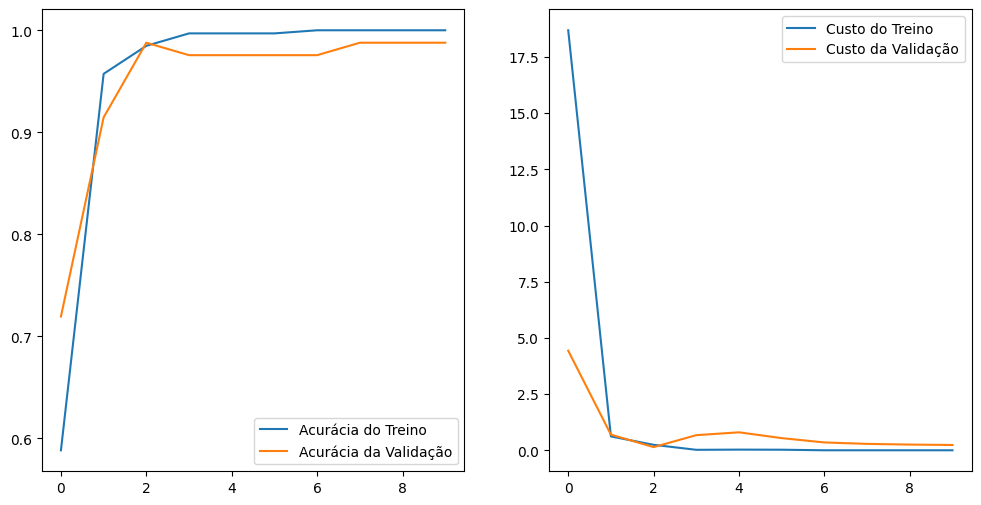

In [29]:
plota_resultados(history,epocas)

In [39]:
# Gerar previsões nos dados de validação
predicoes = modelo.predict(validacao)

# Converter previsões em classes binárias (0 ou 1)
predicoes_binarias = (predicoes > 0.5).astype(int)

# Exibir algumas previsões com rótulos reais
for i, (imagem, rotulo) in enumerate(validacao.unbatch().take(5)):
    rotulo_real = rotulo.numpy().flatten()[0] if len(rotulo.shape) > 0 else rotulo.numpy()
    print(f"Imagem {i+1}: Previsão: {predicoes_binarias[i][0]}, Rótulo real: {rotulo_real}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step
Imagem 1: Previsão: 1, Rótulo real: 1
Imagem 2: Previsão: 0, Rótulo real: 0
Imagem 3: Previsão: 1, Rótulo real: 1
Imagem 4: Previsão: 1, Rótulo real: 1
Imagem 5: Previsão: 0, Rótulo real: 0


In [32]:
len(list(validacao))

2